In [1]:
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data(ExampleDb, package="alakazam")
db <- subset(ExampleDb, c_call %in% c("IGHA", "IGHG") & sample_id == "+7d")

In [20]:
db[,c(8,16,18)] %>% head(3)

v_call_genotyped,duplicate_count,sample_id
<chr>,<dbl>,<chr>
IGHV3-20*01,1,+7d
IGHV6-1*01,1,+7d
IGHV6-1*01,4,+7d


In [23]:
test <- read.csv('./test_data/gw_bcr_out//10x_clone-pass_germ-pass.tsv',sep = '\t')

In [25]:
colnames(db)
colnames(test)
colnames(db)[c(8,16,18)]

[1] "sequence_id"               "sequence_alignment"       
 [3] "germline_alignment"        "germline_alignment_d_mask"
 [5] "rev_comp"                  "productive"               
 [7] "v_call"                    "v_call_genotyped"         
 [9] "d_call"                    "j_call"                   
[11] "c_call"                    "junction"                 
[13] "junction_length"           "np1_length"               
[15] "np2_length"                "duplicate_count"          
[17] "clone_id"                  "sample_id"

[1] "sequence_id"               "sequence"                 
 [3] "rev_comp"                  "productive"               
 [5] "v_call"                    "d_call"                   
 [7] "j_call"                    "sequence_alignment"       
 [9] "germline_alignment"        "junction"                 
[11] "junction_aa"               "v_cigar"                  
[13] "d_cigar"                   "j_cigar"                  
[15] "stop_codon"                "vj_in_frame"              
[17] "locus"                     "junction_length"          
[19] "np1_length"                "np2_length"               
[21] "v_sequence_start"          "v_sequence_end"           
[23] "v_germline_start"          "v_germline_end"           
[25] "d_sequence_start"          "d_sequence_end"           
[27] "d_germline_start"          "d_germline_end"           
[29] "j_sequence_start"          "j_sequence_end"           
[31] "j_germline_start"          "j_germline_end"           
[33] "v_score"                   "v_identity"               
[35] "v_support"                 "d_score"                  
[37] "d_identity"                "d_support"                
[39] "j_score"                   "j_identity"               
[41] "j_support"                 "fwr1"                     
[43] "fwr2"                      "fwr3"                     
[45] "fwr4"                      "cdr1"                     
[47] "cdr2"                      "cdr3"                     
[49] "cell_id"                   "c_call"                   
[51] "consensus_count"           "clone_id"                 
[53] "umi_count"                 "v_call_10x"               
[55] "d_call_10x"                "j_call_10x"               
[57] "junction_10x"              "junction_10x_aa"          
[59] "germline_alignment_d_mask" "germline_v_call"          
[61] "germline_d_call"           "germline_j_call"

[1] "v_call_genotyped" "duplicate_count"  "sample_id"

# SHM ratio

In [26]:
# Calculate R and S mutation counts
db_obs <- observedMutations(test, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=FALSE, 
                            nproc=16)
# Show new mutation count columns
db_obs %>% 
    select(sequence_id, starts_with("mu_count_")) %>%
    head(n=4)

,sequence_id,mu_count_seq_r,mu_count_seq_s
,<chr>,<dbl>,<dbl>
1,CCTCTGAAGGCAATTA-1_contig_2,1,0
2,CGGACGTCAATCCGAT-1_contig_1,0,0
3,CATCAGAAGATGTGGC-1_contig_1,0,0
4,GTAACGTGTCTGATCA-1_contig_2,0,0


In [29]:
db_obs %>% head(3)

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,d_call_10x,j_call_10x,junction_10x,junction_10x_aa,germline_alignment_d_mask,germline_v_call,germline_d_call,germline_j_call,mu_count_seq_r,mu_count_seq_s
,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,CCTCTGAAGGCAATTA-1_contig_2,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCATTTGGTGATCAGGACTGAACAGAGAGAACTCACCATGGAGTTTGGGCTGAGCTGGCTTTTTCTTGTGGCTATTTTAAAAGGTGTCCAGTGTGAGGTGCAGCTGTTGGAGTCTGGGGGAGGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTAGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGTGGTGGTAGCACATACTACGCAGACTCCGTGAAGGGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAGGACGAGTGACCCCGGATGACTACTGCTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG,FALSE,TRUE,"IGHV3-23*01,IGHV3-23D*01","IGHD1-14*01,IGHD2-21*02,IGHD3-3*01",IGHJ6*02,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAGGACGAGTGACCCCGGATGACTACTGCTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAGNNNNNNNNNNNCCGGANNACTACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,TGTGCGAAAGGACGAGTGACCCCGGATGACTACTGCTACTACGGTATGGACGTCTGG,⋯,,IGHJ6,TGTGCGAAAGGACGAGTGACCCCGGATGACTACTGCTACTACGGTATGGACGTCTGG,CAKGRVTPDDYCYYGMDVW,GAGGTGCAGCTGTTGGAGTCTGGGGGA...GGCTTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTT............AGCAGCTATGCCATGAGCTGGGTCCGCCAGGCTCCAGGGAAGGGGCTGGAGTGGGTCTCAGCTATTAGTGGTAGT......GGTGGTAGCACATACTACGCAGACTCCGTGAAG...GGCCGGTTCACCATCTCCAGAGACAATTCCAAGAACACGCTGTATCTGCAAATGAACAGCCTGAGAGCCGAGGACACGGCCGTATATTACTGTGCGAAAGNNNNNNNNNNNNNNNNNNACTACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,IGHV3-23*01,IGHD1-14*01,IGHJ6*02,1,0
2,CGGACGTCAATCCGAT-1_contig_1,GGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATCACAGCTCCTCACCATGGACTGGACCTGGAGCATCCTTTTCTTGGTGGCAGCAGCAACAGGTGCCCACTCCCAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTACAATGGTAACACAAACTATGCACAGAAGCTCCAGGGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGATTCGGCCGAGCCCATAGCAGTGGCTGGGGAAAACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCAGGGAGTGCATCCGCCCCAACCCTTTTCCCCCTCGTCTCCTGTGAGAATTCCCCGTCGGATACGAGCAGCGTG,FALSE,TRUE,IGHV1-18*01,IGHD6-19*01,IGHJ6*02,CAGGTTCAGCTGGTGCAGTCTGGAGCT...GAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTT............ACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTAC......AATGGTAACACAAACTATGCACAGAAGCTCCAG...GGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGATTCGGCCGAGCCCATAGCAGTGGCTGGGGAAAACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,CAGGTTCAGCTGGTGCAGTCTGGAGCT...GAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTT............ACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTAC......AATGGTAACACAAACTATGCACAGAAGCTCCAG...GGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGANNNNNNNNNNNNNATAGCAGTGGCTGGNNNNNACTACTACTACGGTATGGACGTCTGGGGCCAAGGGACCACGGTCACCGTCTCCTCA,TGTGCGAGAGATTCGGCCGAGCCCATAGCAGTGGCTGGGGAAAACTACTACTACGGTATGGACGTCTGG,⋯,,IGHJ

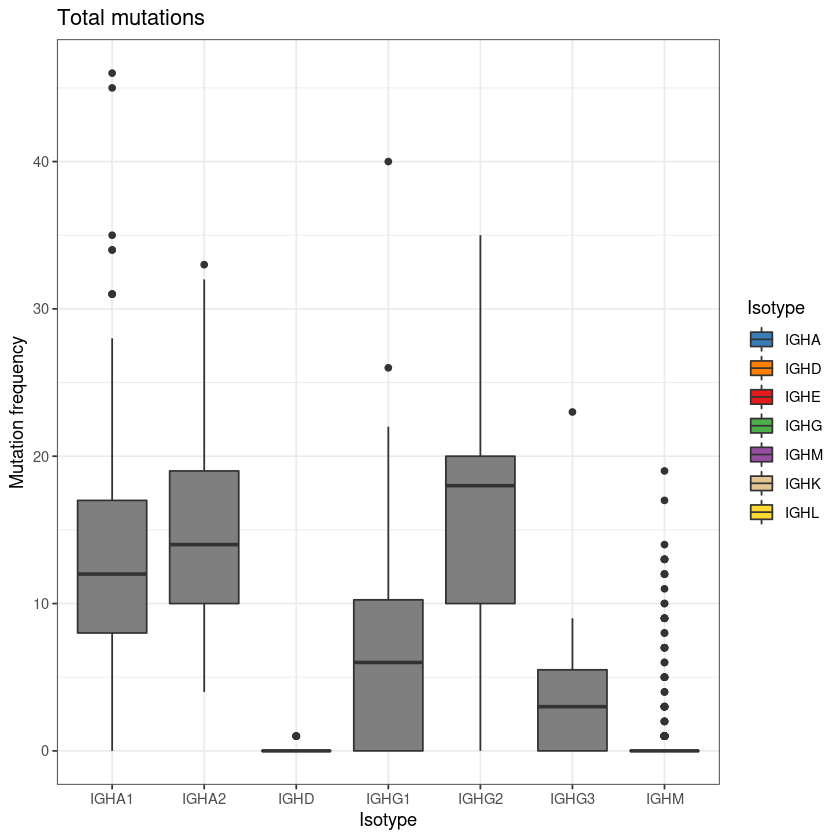

In [30]:
g1 <- ggplot(db_obs, aes(x=c_call, y=mu_count_seq_r, fill=c_call)) +
    theme_bw() + ggtitle("Total mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g1)

# CDR region  mutate

In [38]:
db_obs_v <- observedMutations(test, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_VDJ_BY_REGIONS,
                              frequency=TRUE, 
                              nproc=24)
# Show new FWR mutation columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_")) %>%
    head(n=4)

,sequence_id,mu_freq_cdr1_r,mu_freq_cdr1_s,mu_freq_cdr2_r,mu_freq_cdr2_s,mu_freq_cdr3_r,mu_freq_cdr3_s,mu_freq_fwr1_r,mu_freq_fwr1_s,mu_freq_fwr2_r,mu_freq_fwr2_s,mu_freq_fwr3_r,mu_freq_fwr3_s,mu_freq_fwr4_r,mu_freq_fwr4_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CCTCTGAAGGCAATTA-1_contig_2,0,0,0,0,0.03030303,0,0,0,0,0,0,0,0,0
2,CGGACGTCAATCCGAT-1_contig_1,0,0,0,0,0.00000000,0,0,0,0,0,0,0,0,0
3,CATCAGAAGATGTGGC-1_contig_1,0,0,0,0,0.00000000,0,0,0,0,0,0,0,0,0
4,GTAACGTGTCTGATCA-1_contig_2,0,0,0,0,0.00000000,0,0,0,0,0,0,0,0,0


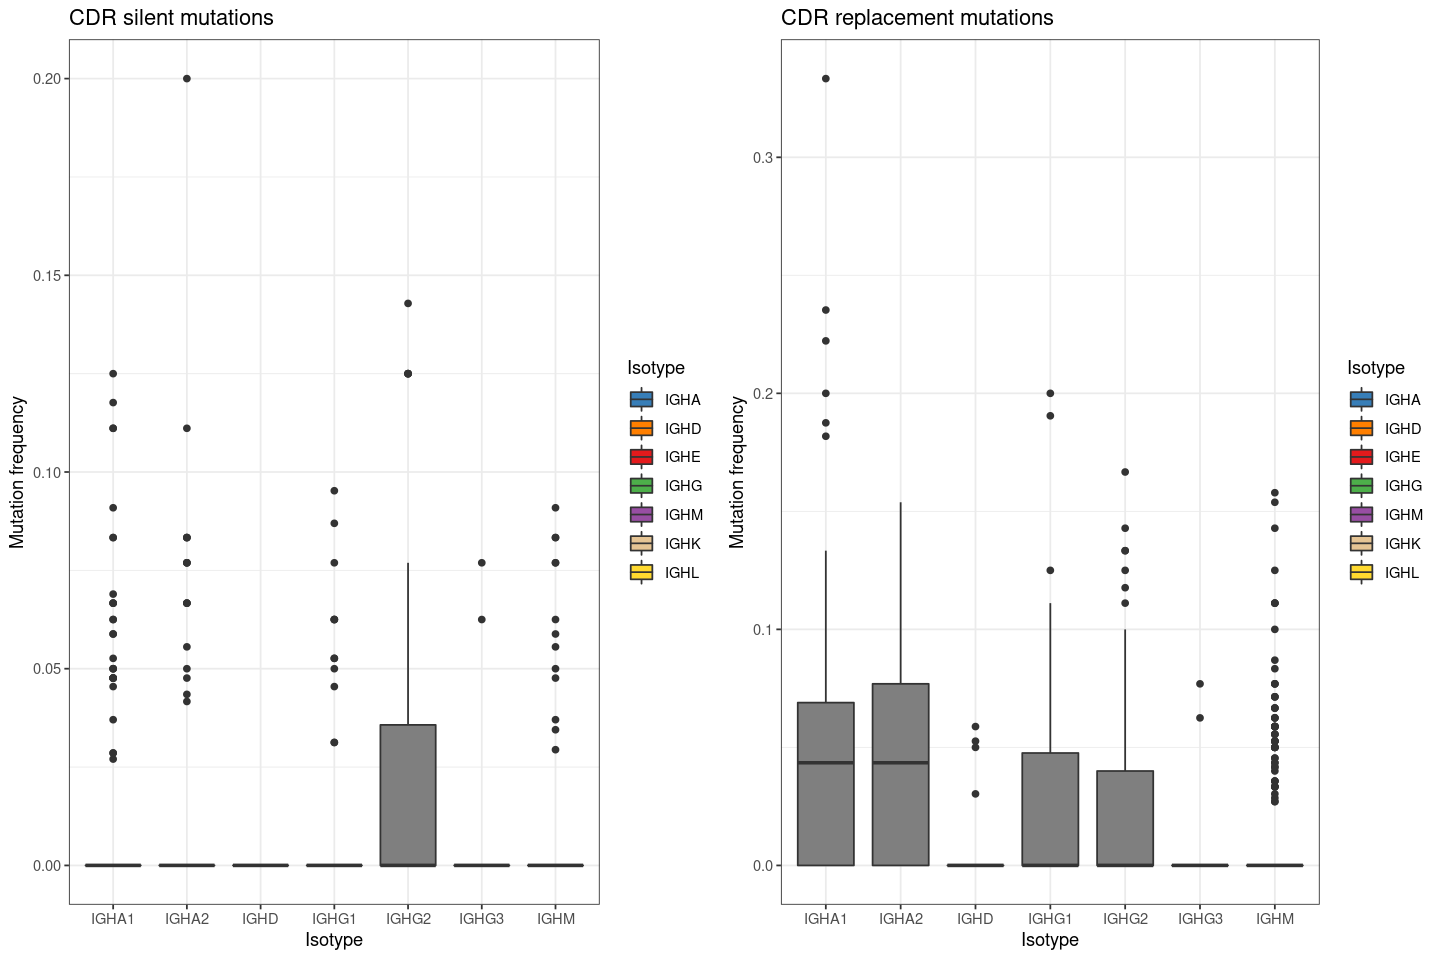

In [39]:
options(repr.plot.width=12, repr.plot.height=8)
g2 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr3_s, fill=c_call)) +
    theme_bw() + ggtitle("CDR silent mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
g3 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr3_r, fill=c_call)) +
    theme_bw() + ggtitle("CDR replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
alakazam::gridPlot(g2, g3, ncol=2)

# Choose Presure

In [40]:
clones <- collapseClones(test, cloneColumn="clone_id", 
                         sequenceColumn="sequence_alignment", 
                         germlineColumn="germline_alignment_d_mask", 
                         regionDefinition=IMGT_V, 
                         method="thresholdedFreq", minimumFrequency=0.6,
                         includeAmbiguous=FALSE, breakTiesStochastic=FALSE, 
                         nproc=24)

In [42]:
clones %>% dim()

[1] 1022   64

In [43]:
baseline <- calcBaseline(clones, testStatistic="focused", 
                         regionDefinition=IMGT_V, nproc=24)

calcBaseline will calculate observed and expected mutations for clonal_sequence using clonal_germline as a reference.



Calculating BASELINe probability density functions...


In [44]:
baseline <- calcBaseline(clones, testStatistic="focused", 
                         regionDefinition=IMGT_V, 
                         targetingModel=MK_RS5NF,
                         mutationDefinition=CHARGE_MUTATIONS,
                         nproc=1)

calcBaseline will calculate observed and expected mutations for clonal_sequence using clonal_germline as a reference.



Calculating BASELINe probability density functions...
